In [1]:
import math as math
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline 

[ 1.69722436  5.30277564] [[-0.95709203 -0.28978415]
 [ 0.28978415 -0.95709203]]
pomarańczowy wekor własny odpowiada wartości własnej równej: 1.69722436227
0.289784148688 -0.957092026489
czerowny wekor własny odpowiada wartości własnej równej: 5.30277563773


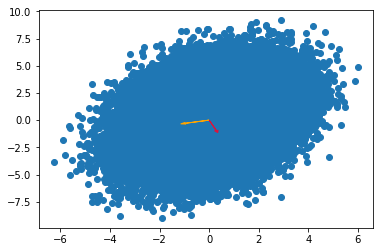

In [8]:
def Gauss_2D(mean,cov,size):
    samples = np.random.multivariate_normal(mean, cov, size)
    w, v = np.linalg.eig(cov)
    plt.autoscale(enable=True)
    print w,v
    plt.scatter([x[0] for x in samples],[x[1] for x in samples])
    colorVal ='orange'
    print "pomarańczowy wekor własny odpowiada wartości własnej równej:",w[0]
    plt.arrow(mean[0],mean[1],v[0][0],v[0][1],head_width=0.15, head_length=0.2,color=colorVal)
    colorVal ='crimson'
    print v[1][0],v[1][1]
    print "czerowny wekor własny odpowiada wartości własnej równej:",w[1]
    plt.arrow(mean[0],mean[1],v[1][0],v[1][1],head_width=0.15, head_length=0.2,color=colorVal)
Gauss_2D(np.array([0,0]),[[2,1],[1,5]],100000)
#print "_______________________"
#w, v = np.linalg.eig([[1,0],[0,1]])
#print w ,v
#print v[1][0]
#a1=[[0,1],[1,0]]
#a2=np.matrix([[0,1],[1,0]])
#print a1,a2
#print a1[0][0],a2[0][0]
    #ax = plt.axes()
    #ax.arrow(0, 0, 3*v[0][0],3*v[0][1] , head_width=0.1, head_length=0.2, fc='k', ec='k')
    #ax.arrow(0, 0, 3*v[1][0],3*v[1][1] , head_width=0.1, head_length=0.2, fc='k', ec='k')    
    


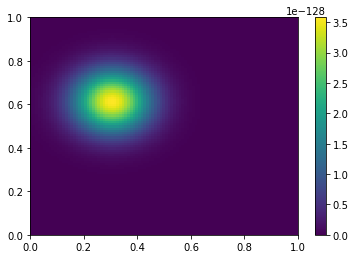

In [95]:
def L(mean,x):
    return 1.0/(2.0*math.pi)*math.exp(-(1.0/2.0)*((x[0]-mean[0])**2+(x[1]-mean[1])**2))
def add_observation(knowledge,obs):
    return [[[y[0],y[1],L([y[0],y[1]],obs)*y[2]] for y in x] for x in knowledge]

def add_samples(knowledge,samples):
    for x in samples:
        knowledge=add_observation(knowledge,x)
    return knowledge
    
n=100
I=np.linspace(0, 1, num=n)
knowledge=[[[x,y,1.0/n**2] for x in I] for y in I]
samples = np.random.multivariate_normal([0.3,0.6], [[1,0],[0,1]], size=100)
knowledge=add_samples(knowledge,samples)
X=[[y[0] for y in x] for x in knowledge]
Y=[[y[1] for y in x] for x in knowledge]
Z=[[y[2] for y in x] for x in knowledge]
X=np.array(X)
Y=np.array(Y)
Z=np.array(Z)
plt.pcolormesh(X,Y,Z)
plt.colorbar()
plt.show()



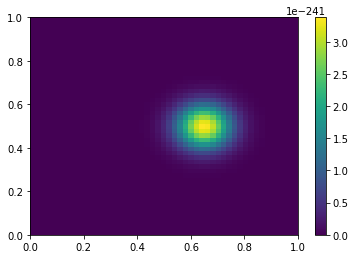

In [101]:
#Rzadsza siadka i punkt poza nią
n=50
I=np.linspace(0, 1, num=n)
knowledge=[[[x,y,1.0/n**2] for x in I] for y in I]
samples = np.random.multivariate_normal([0.7+0.01,0.5+0.01], [[1,0],[0,1]], size=100)
knowledge=add_samples(knowledge,samples)
knowledge=add_samples(knowledge,samples)
X=[[y[0] for y in x] for x in knowledge]
Y=[[y[1] for y in x] for x in knowledge]
Z=[[y[2] for y in x] for x in knowledge]
X=np.array(X)
Y=np.array(Y)
Z=np.array(Z)
plt.pcolormesh(X,Y,Z)
plt.colorbar()
plt.show()

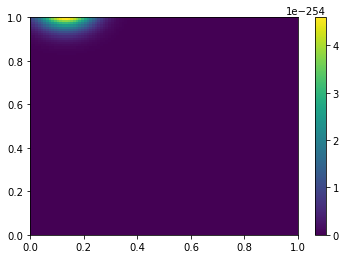

In [104]:
#średnia poza kwadratem
n=100
I=np.linspace(0, 1, num=n)
knowledge=[[[x,y,1.0/n**2] for x in I] for y in I]
samples = np.random.multivariate_normal([0.3,1.2], [[1,0],[0,1]], size=100)
knowledge=add_samples(knowledge,samples)
knowledge=add_samples(knowledge,samples)
X=[[y[0] for y in x] for x in knowledge]
Y=[[y[1] for y in x] for x in knowledge]
Z=[[y[2] for y in x] for x in knowledge]
X=np.array(X)
Y=np.array(Y)
Z=np.array(Z)
plt.pcolormesh(X,Y,Z)
plt.colorbar()
plt.show()

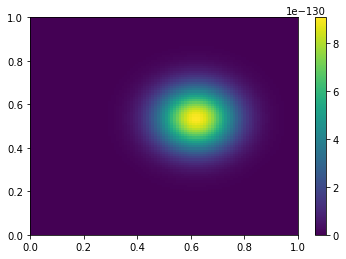

In [123]:
n=100
I=np.linspace(0, 1, num=n)
knowledge=[[[x,y,1.0/n**2] for x in I] for y in I]
samples1 = np.random.multivariate_normal([0.3,0.7], [[1,0],[0,1]], size=50)
samples2 = np.random.multivariate_normal([0.7,0.3], [[1,0],[0,1]], size=50)
samples = np.append(samples1,samples2,axis=0) #we wzorze nie ma wpływu kolejność obserwacji
knowledge=add_samples(knowledge,samples)
X=[[y[0] for y in x] for x in knowledge]
Y=[[y[1] for y in x] for x in knowledge]
Z=[[y[2] for y in x] for x in knowledge]
X=np.array(X)
Y=np.array(Y)
Z=np.array(Z)
plt.pcolormesh(X,Y,Z)
plt.colorbar()
plt.show()

Niech $\Omega_1=\{(x_1,..,x_10):x_1,..x_10\in\{0,1\} \}$ a $\Omega_2=\{0,1,...,10\}$ i niech $\theta\in[0,1]$ oznacza prawdopodobieństwo wypadniecia orła 

$\Omega_a$ zdarzenia w których znamy kolejność wypadania orłów dla każdego $x\in\Omega_1$ prawdopodobieństwo wynosi $P_\theta(\{x\})=\frac{\theta^m(1-\theta)^{(10-m)}}{2^{10}}$ gdzie m oznacza liczbę jedynek (orłów) w wektorze x

$\Omega_b$ zdarzenia z których znamy tylko ilość orłów które wypadły dla każdego $x\in\Omega_2$ prawdopodobieństwo wynosi $P_\theta(\{x\})={10 \choose x}\frac{\theta^m(1-\theta)^{(10-m)}}{2^{10}}$

A więc jeśli $x\in \Omega_a$ opowiada m jedynką a $y\in \Omega_b$,$y=m$ to $\alpha P_\theta(\{x\})= P_\theta(\{y\})$, gdzie $\alpha\in\mathbb{N}$

Niech $\Omega_\theta=[0,1]$ a $P:\mathcal{B}([0,1])\rightarrow[0,1]$ oznacza nasze prawdopodobieństowo apriori

Zdefinujmy teraz $\Omega_{\theta a}=\Omega_\theta\times\Omega_a$ i $P:\mathcal{B}([0,1])\times\mathcal{P(\Omega_a)}\rightarrow[0,1]$ jako $P(I\times A)=\sum_{\theta\in I} P(\theta)P_\theta(B)$ oraz analogicznie zdefinujemy $\Omega_{\theta b}$

Oznaczmy przez $x\in\Omega_a$ wektor(1, 1, 0, 0, 1, 0, 1, 1, 1, 1) a $y\in\Omega_b$,y=7 ze wzoru Bayesa mamy

$$P(\{\theta\}\times\Omega_a|\Omega_\theta\times\{x\})=\frac{P(\Omega_\theta\times\{x\}|\{\theta\}\times\Omega_a)P(\{\theta\}\times\Omega_a)}{P(\Omega_\theta\times\{x\})}=\frac{P_\theta(\{x\})P(\theta)}{\sum_{\theta\in I} P(\theta)P_\theta(\{x\})}$$

Dalej korzystając z tego, że $\alpha P_\theta(\{x\})= P_\theta(\{y\})$ mamy

$$\frac{P_\theta(\{x\})P(\theta)}{\sum_{\theta\in I} P(\theta)P_\theta(\{x\})}=\frac{\alpha  P_\theta(\{y\})P(\theta)}{\sum_{\theta\in I} P(\theta)\alpha P_\theta(\{y\})}=\frac{ P_\theta(\{y\})P(\theta)}{\sum_{\theta\in I} P(\theta) P_\theta(\{y\})}$$

I dalej mamy korzystając jeszcze raz ze wzoru Bayesa mamy

$$\frac{ P_\theta(\{y\})P(\theta)}{\sum_{\theta\in I} P(\theta) P_\theta(\{y\})}=\frac{P(\Omega_\theta\times\{y\}|\{\theta\}\times\Omega_b)P(\{\theta\}\times\Omega_b)}{P(\Omega_\theta\times\{y\})}=P(\{\theta\}\times\Omega_b|\Omega_\theta\times\{y\})$$